Angle Solution: 6.626157574832819 degrees
Force Normal Solution: 36.33856415628871 N
Force Location Solution: 0.09675692537257954 m
Length Solution: 0.09019784289377547 m
Width Solution: 0.005 m
Height Solution: 0.01 m
Angle Solution: 59.870807623392345 degrees
Force Normal Solution: 39.86301203547912 N


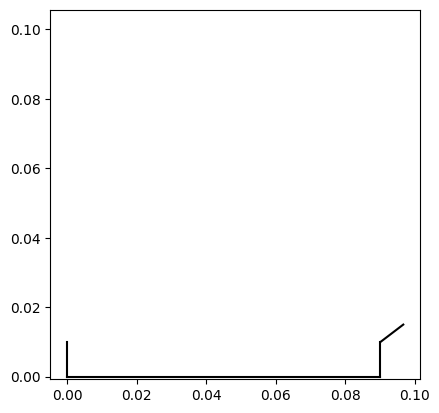

In [54]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

# Define your equations as the objective function (sum of squared residuals)
def objective_in(vars, force_hand, coefficient_friction, elastic_modulus):

    angle, force_normal, load_location, length_beam, width_beam, height_beam = vars

    I_beam = (width_beam * height_beam**3) / 12
    deflection = 0.1 * length_beam

    # First equation
    eq1 = (force_hand) / (coefficient_friction * np.cos(angle) + np.sin(angle)) - force_normal
    # Second equation
    eq2 = ((3 * elastic_modulus * I_beam) / load_location**3) * deflection - force_normal * np.cos(angle)

    eq3 = length_beam - (deflection / np.tan(angle)) - load_location

    return eq1**2 + eq2**2 + eq3**2

# Function to enforce angle constraints using minimize
def constrained_solve_minimize_in(initial_guess, force_hand, coefficient_friction, elastic_modulus):
    # Bounds for the variables: angle between 0 and pi/2 (0 to 90 degrees in radians)
    bounds = [(0, np.pi/2), (None, None), (0.5*5e-2,0.5*15e-2), (5e-2,15e-2), (0.5e-2,10e-2), (1e-2,5e-2)]  # Angle in radians, force_normal unbounded
    
    # Minimize the objective function with constraints
    result = minimize(
        objective_in,
        initial_guess,
        args=(force_hand, coefficient_friction, elastic_modulus),
        bounds=bounds,
        method='L-BFGS-B'  # Suitable for bounded problems
    )
    
    return result.x

# Example input parameters
force_hand_in = 22.241
coefficient_friction = 0.5
elastic_modulus = 2900e6

# Initial guess for [angle, force_normal]
initial_guess = [0.1, 100,0.1,10e-2,5e-2,0.25e-2]  # Initial angle in radians and force_normal

# Solve the system with minimize
solution = constrained_solve_minimize_in(initial_guess, force_hand_in, coefficient_friction, elastic_modulus)
angle_solution_in, force_normal_solution_in, force_location_solution, length_solution, width_solution, height_solution = solution

# Convert angle to degrees for output
angle_solution_degrees_in = np.degrees(angle_solution_in)

print(f"Angle Solution: {angle_solution_degrees_in} degrees")
print(f"Force Normal Solution: {force_normal_solution_in} N")
print(f"Force Location Solution: {force_location_solution} m")
print(f"Length Solution: {length_solution} m")
print(f"Width Solution: {width_solution} m")
print(f"Height Solution: {height_solution} m")

# Define your equations as the objective function (sum of squared residuals)
def objective_out(vars, force_hand, coefficient_friction, elastic_modulus, load_location, width_beam, height_beam):

    angle, force_normal = vars

    I_beam = (width_beam * height_beam**3) / 12
    deflection = height_beam / 2

    # First equation
    eq1 = (force_hand) / (coefficient_friction * np.cos(angle) + np.sin(angle)) - force_normal
    # Second equation
    eq2 = ((3 * elastic_modulus * I_beam) / load_location**3) * deflection - force_normal * np.cos(angle)

    return eq1**2 + eq2**2

# Function to enforce angle constraints using minimize
def constrained_solve_minimize_out(initial_guess, force_hand, coefficient_friction, elastic_modulus, load_location, width_beam, height_beam):
    # Bounds for the variables: angle between 0 and pi/2 (0 to 90 degrees in radians)
    bounds = [(0, np.pi/2), (None, None)]  # Angle in radians, force_normal unbounded
    
    # Minimize the objective function with constraints
    result = minimize(
        objective_out,
        initial_guess,
        args=(force_hand, coefficient_friction, elastic_modulus, load_location, width_beam, height_beam),
        bounds=bounds,
        method='L-BFGS-B'  # Suitable for bounded problems
    )
    
    return result.x

# Example input parameters
force_hand_out = 22.241 * 2
coefficient_friction = 0.5
elastic_modulus = 2900e6

# Initial guess for [angle, force_normal]
initial_guess = [0.1, 100]  # Initial angle in radians and force_normal

# Solve the system with minimize
solution = constrained_solve_minimize_out(initial_guess, force_hand_out, coefficient_friction, elastic_modulus, force_location_solution, width_solution, height_solution)
angle_solution_out, force_normal_solution_out = solution

# Convert angle to degrees for output
angle_solution_degrees_out = np.degrees(angle_solution_out)

print(f"Angle Solution: {angle_solution_degrees_out} degrees")
print(f"Force Normal Solution: {force_normal_solution_out} N")

rampup_location = force_location_solution - (height_solution / 2) / np.tan(angle_solution_out)

plt.figure()
plt.plot([length_solution,0],[0,0],'black')
plt.plot([0,0],[0,height_solution],'black')
plt.plot([length_solution,length_solution],[0,height_solution],'black')
plt.plot([length_solution,force_location_solution],[height_solution,height_solution+height_solution/2],'black')
# plt.plot([0,rampup_location],[height_solution,height_solution],'black')
# plt.plot([rampup_location,force_location_solution],[height_solution,height_solution+height_solution/2],'black')
plt.axis('square')
plt.show()

